In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from IPython.display import display, Markdown


In [2]:
with open("/content/CN1_M1.txt", "r", encoding="utf-8") as f:
    qp_text = f.read()

pattern = re.compile(
    r"(?P<QNo>[1-9][a-z])\s*[\n:]?"
    r"(?P<Question>.*?)\s+"
    r"(?P<Marks>\d+)\s+"
    r"(?P<CO>\d+)\s+"
    r"(?P<BloomLevel>L\d+)\s+"
    r"(?P<PO>\d+)\s+"
    r"(?P<PICode>\d+\.\d+\.\d+)",
    re.DOTALL
)

matches = pattern.findall(qp_text)
qp_metadata = pd.DataFrame(matches, columns=["Q.No", "Question", "Max Marks", "CO", "Bloom Level", "PO", "PI Code"])
qp_metadata["Q.No"] = qp_metadata["Q.No"].str.strip().str.lower()


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
folder_path = "/content/drive/MyDrive/ALL_division"

all_marks = []

for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        div = file.split("_")[0].upper()
        path = os.path.join(folder_path, file)
        df = pd.read_csv(path)
        df["Division"] = div
        all_marks.append(df)

# Combine into one DataFrame
combined_df = pd.concat(all_marks, ignore_index=True)


In [7]:
non_question_cols = ["SL.No", "Roll.No", "USN", "Name", "Division"]
question_cols = [col for col in combined_df.columns if col not in non_question_cols]

marks_df = combined_df[question_cols].replace("-", pd.NA).apply(pd.to_numeric, errors='coerce')
marks_df.columns = marks_df.columns.str.strip().str.lower()


In [8]:
valid_questions = list(set(qp_metadata["Q.No"]) & set(marks_df.columns))
marks_df_filtered = marks_df[valid_questions]

summary = pd.DataFrame(index=marks_df_filtered.columns)
summary["Avg Marks"] = marks_df_filtered.mean()
summary["Max Marks"] = summary.index.map(qp_metadata.set_index("Q.No")["Max Marks"].astype(int))
summary["Bloom Level"] = summary.index.map(qp_metadata.set_index("Q.No")["Bloom Level"])


In [13]:
bloom_grouped_df = summary.groupby("Bloom Level").agg(
    bloom_total_marks=('Avg Marks', 'sum'),
    bloom_avg_per_question=('Avg Marks', 'mean'),
    bloom_question_count=('Avg Marks', 'count')
).round(2)

display(Markdown("### ✅ Bloom’s Level Summary (All Divisions Combined)"))
display(bloom_grouped_df)


### ✅ Bloom’s Level Summary (All Divisions Combined)

,bloom_total_marks,bloom_avg_per_question,bloom_question_count
Bloom Level,,,
L2,8.68,2.89,3
L3,18.40,3.07,6


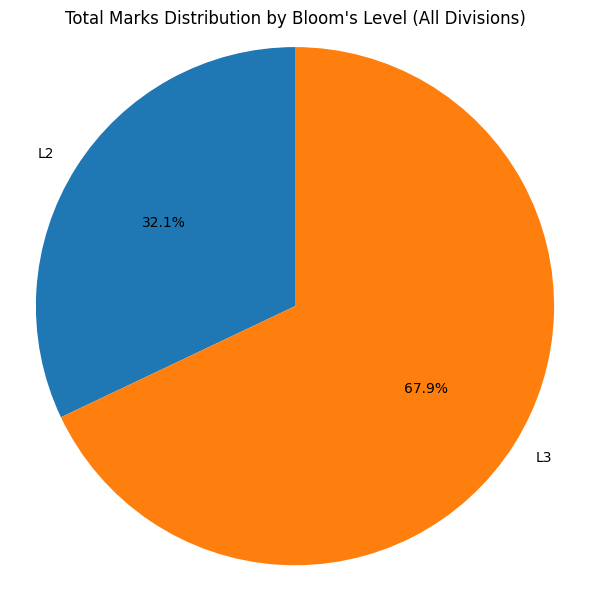

In [14]:
plt.figure(figsize=(6, 6))
plt.pie(
    bloom_grouped_df['bloom_total_marks'],
    labels=bloom_grouped_df.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Total Marks Distribution by Bloom's Level (All Divisions)")
plt.axis('equal')
plt.tight_layout()
plt.savefig("bloom_all_divisions_pie_chart.png")
plt.show()


In [15]:
# Example: bloom_grouped_df from earlier steps
level_dist = bloom_grouped_df['bloom_total_marks']
level_pct = (level_dist / level_dist.sum() * 100).round(1)

# Extract values safely
l1 = level_pct.get('L1', 0)
l2 = level_pct.get('L2', 0)
l3 = level_pct.get('L3', 0)

# Dynamic comment generator
interpretation = f"""
### 🧠 Bloom’s Level Performance Interpretation

- **L1 (Recall):** {l1}%
- **L2 (Understanding/Application):** {l2}%
- **L3 (Analysis/Evaluation):** {l3}%

This distribution shows that:
"""

if l3 > max(l1, l2):
    interpretation += f"Students are scoring highest in **L3**, indicating strong performance in analytical and evaluative questions."
elif l2 > max(l1, l3):
    interpretation += f"Most marks are scored in **L2**, suggesting assessments are focused on understanding and application."
elif l1 > max(l2, l3):
    interpretation += f"Majority of scores lie in **L1**, pointing to a focus on recall-level questions."
else:
    interpretation += f"Performance is fairly distributed across cognitive levels."

# Add conclusion
interpretation += "\n\n> These insights can help refine assessment balance and teaching focus."

from IPython.display import Markdown, display
display(Markdown(interpretation))



### 🧠 Bloom’s Level Performance Interpretation

- **L1 (Recall):** 0%  
- **L2 (Understanding/Application):** 32.1%  
- **L3 (Analysis/Evaluation):** 67.9%

This distribution shows that:
Students are scoring highest in **L3**, indicating strong performance in analytical and evaluative questions.

> These insights can help refine assessment balance and teaching focus.

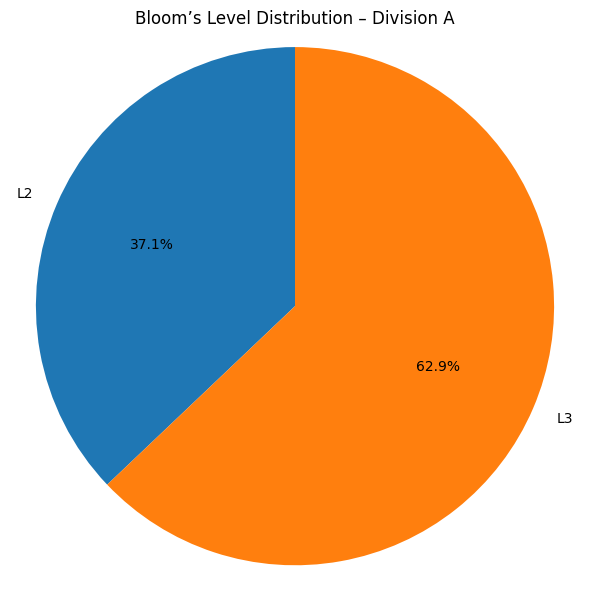


### 📘 Bloom’s Level Summary – Division A

- **L1 (Recall):** 0%
- **L2 (Understanding/Application):** 37.1%
- **L3 (Analysis/Evaluation):** 62.9%

This analysis shows that:  
🟢 Students are scoring highest in **L3**, showing strength in higher-order thinking and evaluation.

> These insights can help faculty adjust question design and teaching strategy.

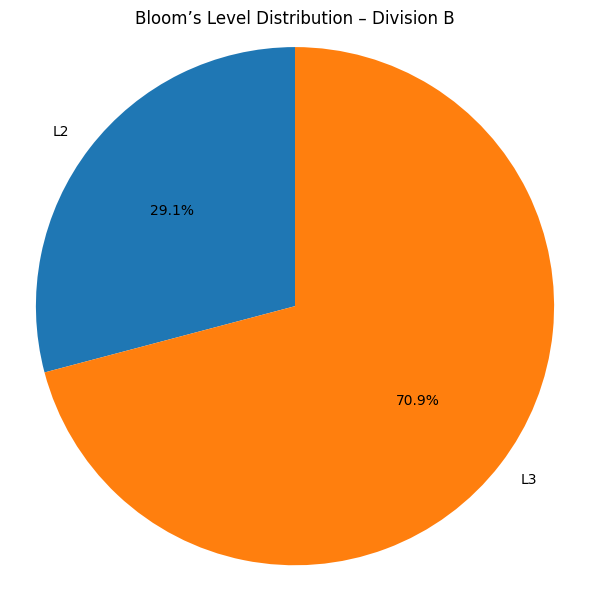


### 📘 Bloom’s Level Summary – Division B

- **L1 (Recall):** 0%
- **L2 (Understanding/Application):** 29.1%
- **L3 (Analysis/Evaluation):** 70.9%

This analysis shows that:  
🟢 Students are scoring highest in **L3**, showing strength in higher-order thinking and evaluation.

> These insights can help faculty adjust question design and teaching strategy.

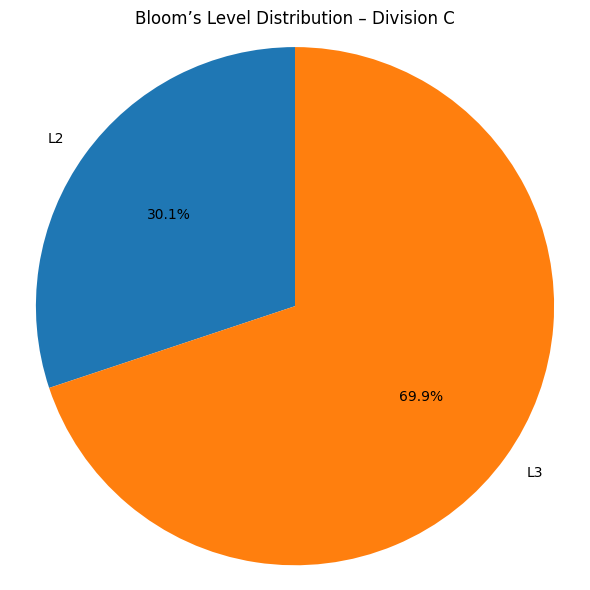


### 📘 Bloom’s Level Summary – Division C

- **L1 (Recall):** 0%
- **L2 (Understanding/Application):** 30.1%
- **L3 (Analysis/Evaluation):** 69.9%

This analysis shows that:  
🟢 Students are scoring highest in **L3**, showing strength in higher-order thinking and evaluation.

> These insights can help faculty adjust question design and teaching strategy.

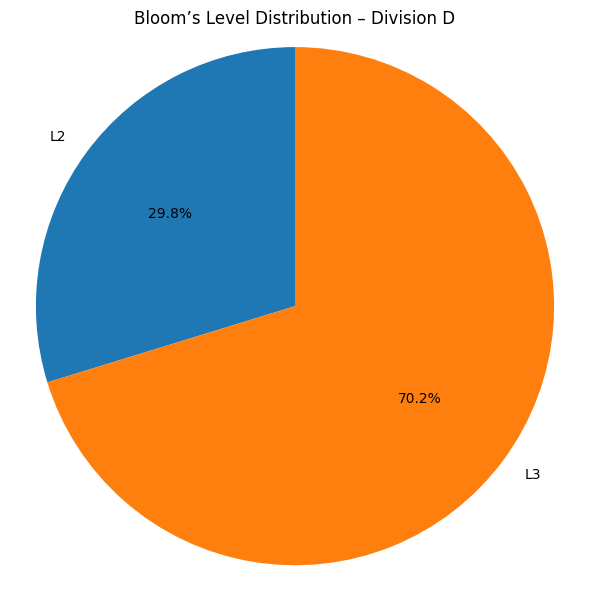


### 📘 Bloom’s Level Summary – Division D

- **L1 (Recall):** 0%
- **L2 (Understanding/Application):** 29.8%
- **L3 (Analysis/Evaluation):** 70.2%

This analysis shows that:  
🟢 Students are scoring highest in **L3**, showing strength in higher-order thinking and evaluation.

> These insights can help faculty adjust question design and teaching strategy.

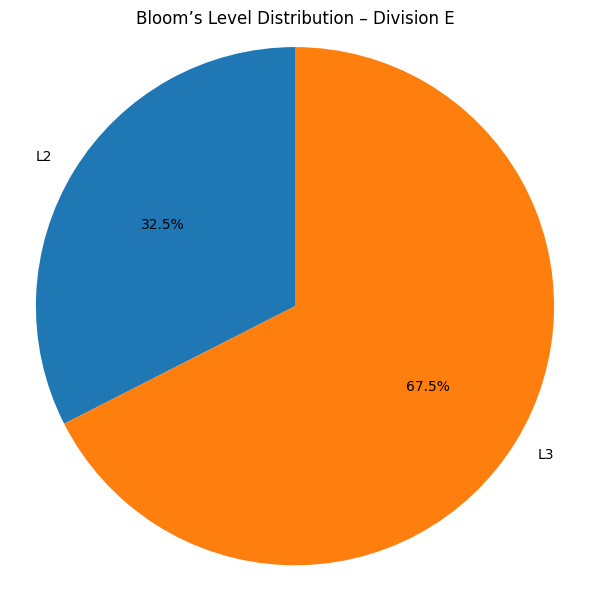


### 📘 Bloom’s Level Summary – Division E

- **L1 (Recall):** 0%
- **L2 (Understanding/Application):** 32.5%
- **L3 (Analysis/Evaluation):** 67.5%

This analysis shows that:  
🟢 Students are scoring highest in **L3**, showing strength in higher-order thinking and evaluation.

> These insights can help faculty adjust question design and teaching strategy.

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import Markdown, display

# === 1. Load question metadata (CN1_M1.txt) ===
with open("/content/CN1_M1.txt", "r", encoding="utf-8") as f:
    qp_text = f.read()

pattern = re.compile(
    r"(?P<QNo>[1-9][a-z])\s*[\n:]?"
    r"(?P<Question>.*?)\s+"
    r"(?P<Marks>\d+)\s+"
    r"(?P<CO>\d+)\s+"
    r"(?P<BloomLevel>L\d+)\s+"
    r"(?P<PO>\d+)\s+"
    r"(?P<PICode>\d+\.\d+\.\d+)",
    re.DOTALL
)

matches = pattern.findall(qp_text)
qp_metadata = pd.DataFrame(matches, columns=["Q.No", "Question", "Max Marks", "CO", "Bloom Level", "PO", "PI Code"])
qp_metadata["Q.No"] = qp_metadata["Q.No"].str.strip().str.lower()

# === 2. Loop through all division CSVs ===
folder_path = "/content/drive/MyDrive/ALL_division"

for file in sorted(os.listdir(folder_path)):
    if file.endswith(".csv"):
        div_name = file.split("_")[0].upper()
        file_path = os.path.join(folder_path, file)

        df = pd.read_csv(file_path)
        df = df.drop(columns=["SL.No", "Roll.No", "USN", "Name"], errors="ignore")
        df = df.replace("-", pd.NA).apply(pd.to_numeric, errors='coerce')
        df.columns = df.columns.str.lower()

        valid_qs = list(set(qp_metadata["Q.No"]) & set(df.columns))
        marks_df_filtered = df[valid_qs]

        # Build summary
        summary = pd.DataFrame(index=marks_df_filtered.columns)
        summary["Avg Marks"] = marks_df_filtered.mean()
        summary["Max Marks"] = summary.index.map(qp_metadata.set_index("Q.No")["Max Marks"].astype(int))
        summary["Bloom Level"] = summary.index.map(qp_metadata.set_index("Q.No")["Bloom Level"])

        # Group by Bloom
        bloom_grouped = summary.groupby("Bloom Level").agg(
            bloom_total_marks=('Avg Marks', 'sum'),
            bloom_avg_per_question=('Avg Marks', 'mean'),
            bloom_question_count=('Avg Marks', 'count')
        ).round(2)

        # Pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(
            bloom_grouped['bloom_total_marks'],
            labels=bloom_grouped.index,
            autopct='%1.1f%%',
            startangle=90
        )
        plt.title(f"Bloom’s Level Distribution – Division {div_name}")
        plt.axis('equal')
        plt.tight_layout()
        chart_filename = f"bloom_div_{div_name}.png"
        plt.savefig(chart_filename)
        plt.show()

        # Dynamic interpretation
        level_pct = (bloom_grouped['bloom_total_marks'] / bloom_grouped['bloom_total_marks'].sum() * 100).round(1)
        l1 = level_pct.get('L1', 0)
        l2 = level_pct.get('L2', 0)
        l3 = level_pct.get('L3', 0)

        interpretation = f"""
### 📘 Bloom’s Level Summary – Division {div_name}

- **L1 (Recall):** {l1}%
- **L2 (Understanding/Application):** {l2}%
- **L3 (Analysis/Evaluation):** {l3}%

This analysis shows that:
"""
        if l3 > max(l1, l2):
            interpretation += "🟢 Students are scoring highest in **L3**, showing strength in higher-order thinking and evaluation."
        elif l2 > max(l1, l3):
            interpretation += "🟡 Most marks lie in **L2**, indicating a focus on understanding/application-level questions."
        elif l1 > max(l2, l3):
            interpretation += "🔵 Scores are mostly from **L1**, which may point to an emphasis on memory-based or basic recall questions."
        else:
            interpretation += "⚖️ Performance appears balanced across all Bloom levels."

        interpretation += "\n\n> These insights can help faculty adjust question design and teaching strategy."

        display(Markdown(interpretation))


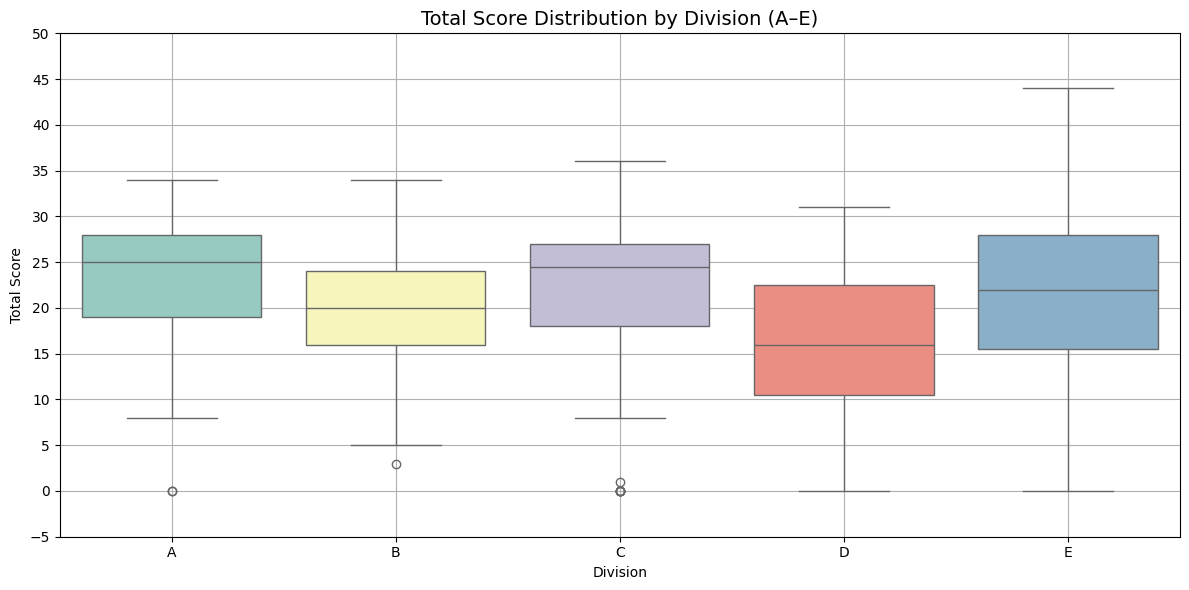

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=score_df, palette="Set3")
plt.title("Total Score Distribution by Division (A–E)", fontsize=14)
plt.ylabel("Total Score")
plt.xlabel("Division")
plt.grid(True)

# Set y-axis ticks with fixed gap (e.g., every 5 marks)
min_score = int(score_df.min().min())
max_score = int(score_df.max().max())
plt.yticks(range(min_score - 5, max_score + 10, 5))  # e.g., from 5 to 50, step = 5

plt.tight_layout()
plt.savefig("groupwise_score_boxplot.png")
plt.show()


In [22]:
from IPython.display import display, Markdown

# Calculate key stats
division_means = score_df.mean().round(2)
highest_div = division_means.idxmax()
lowest_div = division_means.idxmin()
gap = division_means.max() - division_means.min()

# Generate interpretation
comment = f"""
### 📘 Group-Wise Total Score Interpretation

- **Highest performing division:** {highest_div} (avg: {division_means[highest_div]})
- **Lowest performing division:** {lowest_div} (avg: {division_means[lowest_div]})
- **Performance gap:** {gap:.2f} marks

This distribution shows that:
"""

if gap < 5:
    comment += f"🔹 All divisions performed similarly, with only a small variation of {gap:.2f} marks."
elif gap < 10:
    comment += f"🟡 There is moderate variation between divisions. {lowest_div} may need slight intervention or review."
else:
    comment += f"🔴 Significant performance gap detected. {lowest_div} may require academic support or targeted review."

comment += "\n\n> Use this to guide section-specific feedback and moderation if needed."

# Display
display(Markdown(comment))



### 📘 Group-Wise Total Score Interpretation

- **Highest performing division:** A (avg: 23.05)
- **Lowest performing division:** D (avg: 15.68)
- **Performance gap:** 7.37 marks

This distribution shows that:
🟡 There is moderate variation between divisions. D may need slight intervention or review.

> Use this to guide section-specific feedback and moderation if needed.

<ipython-input-24-c3095df38f78>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=division_means.index, y=division_means.values, palette="Set2")


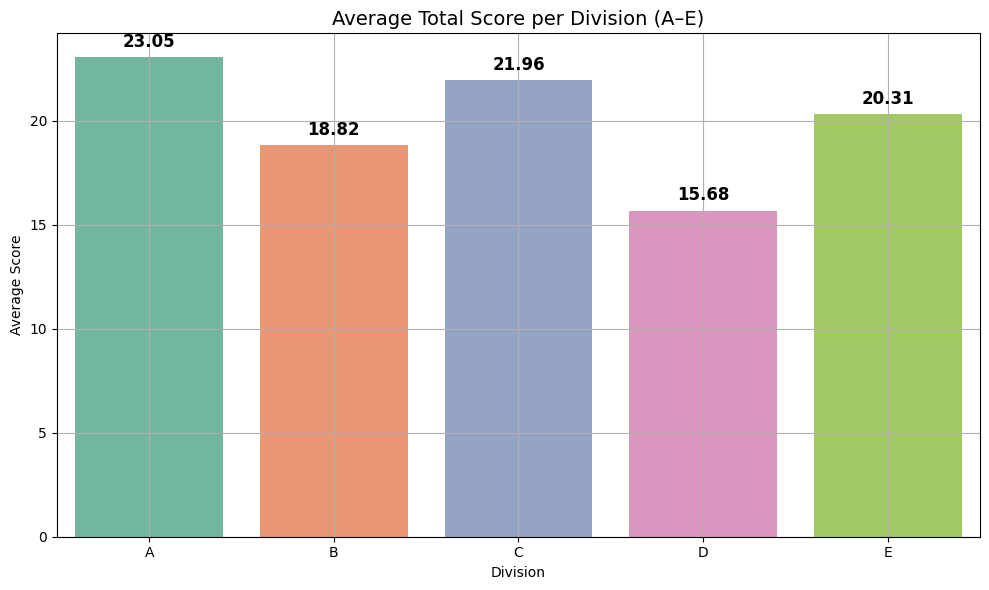

In [24]:
# Compute average per division
division_means = score_df.mean().round(2)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=division_means.index, y=division_means.values, palette="Set2")

# Annotate each bar with mean
for i, val in enumerate(division_means):
    plt.text(i, val + 0.5, f"{val}", ha='center', fontsize=12, fontweight='bold')

plt.title("Average Total Score per Division (A–E)", fontsize=14)
plt.ylabel("Average Score")
plt.xlabel("Division")
plt.grid(True)
plt.tight_layout()
plt.savefig("groupwise_score_bar_chart.png")
plt.show()


In [25]:
summary_table = pd.DataFrame({
    "Division": division_means.index,
    "Average Score": division_means.values,
    "Std Deviation": score_df.std().round(2).values,
    "Max Score": score_df.max().values,
    "Min Score": score_df.min().values,
    "Student Count": score_df.count().values
})

from IPython.display import display
display(summary_table.sort_values("Division"))


,Division,Average Score,Std Deviation,Max Score,Min Score,Student Count
0,A,23.05,7.05,34.0,0.0,73
1,B,18.82,6.42,34.0,3.0,71
2,C,21.96,8.99,36.0,0.0,76
3,D,15.68,8.83,31.0,0.0,71
4,E,20.31,10.98,44.0,0.0,71


In [26]:
  import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display, Markdown


In [27]:
# Combine all scores into a single Series
all_scores = pd.concat([series for series in division_scores.values()], ignore_index=True)

# Assume max score is 40 (or adjust as needed)
max_score = 40
percentage_scores = (all_scores / max_score * 100).round(1)


In [28]:
bins = [0, 20, 40, 60, 80, 100]
labels = ["0–20%", "21–40%", "41–60%", "61–80%", "81–100%"]
performance_band = pd.cut(percentage_scores, bins=bins, labels=labels, right=True, include_lowest=True)
band_counts = performance_band.value_counts().sort_index()


<ipython-input-31-ca568f10f7b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=band_counts.index, y=band_counts.values, palette="coolwarm")


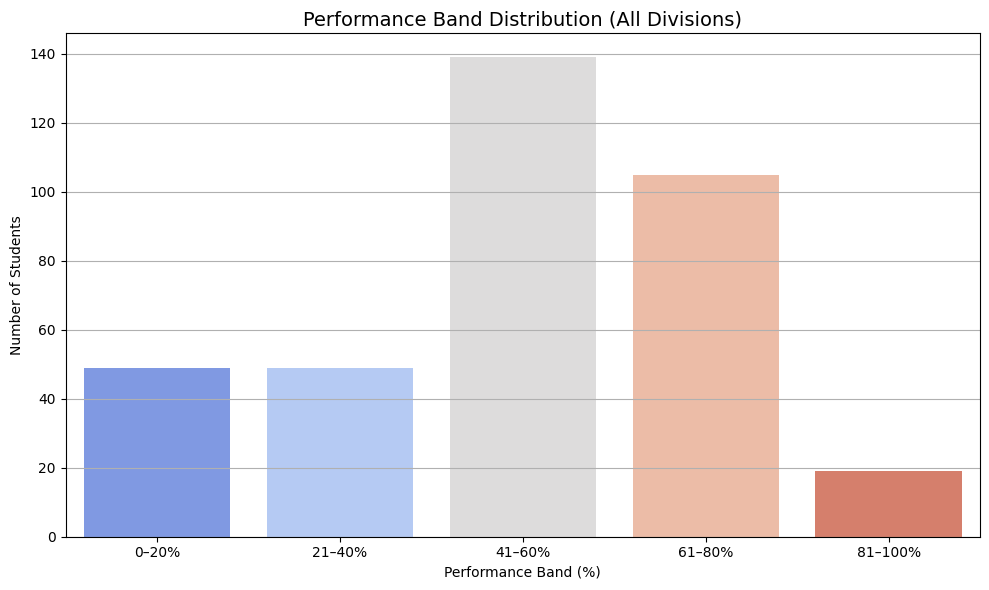

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=band_counts.index, y=band_counts.values, palette="coolwarm")

plt.title("Performance Band Distribution (All Divisions)", fontsize=14)
plt.xlabel("Performance Band (%)")
plt.ylabel("Number of Students")
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("performance_band_distribution.png")
plt.show()


In [30]:
top_band = band_counts.idxmax()
top_count = band_counts.max()
bottom_band = band_counts.idxmin()
bottom_count = band_counts.min()

interpretation = f"""
### 📘 Interpretation – Performance Band Distribution

- **Most students ({top_count}) scored in the** `{top_band}` **range.**
- **Fewest students ({bottom_count}) are in the** `{bottom_band}` **band.**

This distribution provides a quick snapshot of student strength across the cohort. If many students are in lower bands (e.g., below 40%), it may indicate the need for remedial action.

> Use this to prioritize academic support or content revision.
"""

display(Markdown(interpretation))



### 📘 Interpretation – Performance Band Distribution

- **Most students (139) scored in the** `41–60%` **range.**
- **Fewest students (19) are in the** `81–100%` **band.**

This distribution provides a quick snapshot of student strength across the cohort. If many students are in lower bands (e.g., below 40%), it may indicate the need for remedial action.

> Use this to prioritize academic support or content revision.


In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Rebuild marks_df_combined from all divisions
all_marks = []

for file in sorted(os.listdir(folder_path)):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df = df.drop(columns=["SL.No", "Roll.No", "USN", "Name"], errors="ignore")
        df = df.replace("-", pd.NA).apply(pd.to_numeric, errors="coerce")
        df.columns = df.columns.str.strip().str.lower()
        all_marks.append(df)

# Concatenate all divisions
marks_df_combined = pd.concat(all_marks, ignore_index=True)


In [33]:
# Ensure metadata is clean
qp_metadata["Q.No"] = qp_metadata["Q.No"].str.lower().str.strip()

# Get only valid questions
valid_questions = list(set(marks_df_combined.columns) & set(qp_metadata["Q.No"]))
marks_df_filtered = marks_df_combined[valid_questions]

# Map max marks
max_marks_map = qp_metadata.set_index("Q.No")["Max Marks"].astype(int)
avg_scores = marks_df_filtered.mean()
max_scores = avg_scores.index.map(max_marks_map)

# Calculate Difficulty Index
difficulty_index = (avg_scores / max_scores.astype(float)) * 100
difficulty_df = pd.DataFrame({
    "Avg Score": avg_scores.round(2),
    "Max Marks": max_scores,
    "Difficulty Index (%)": difficulty_index.round(2)
}).sort_values("Difficulty Index (%)")


<ipython-input-35-811fe05062eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


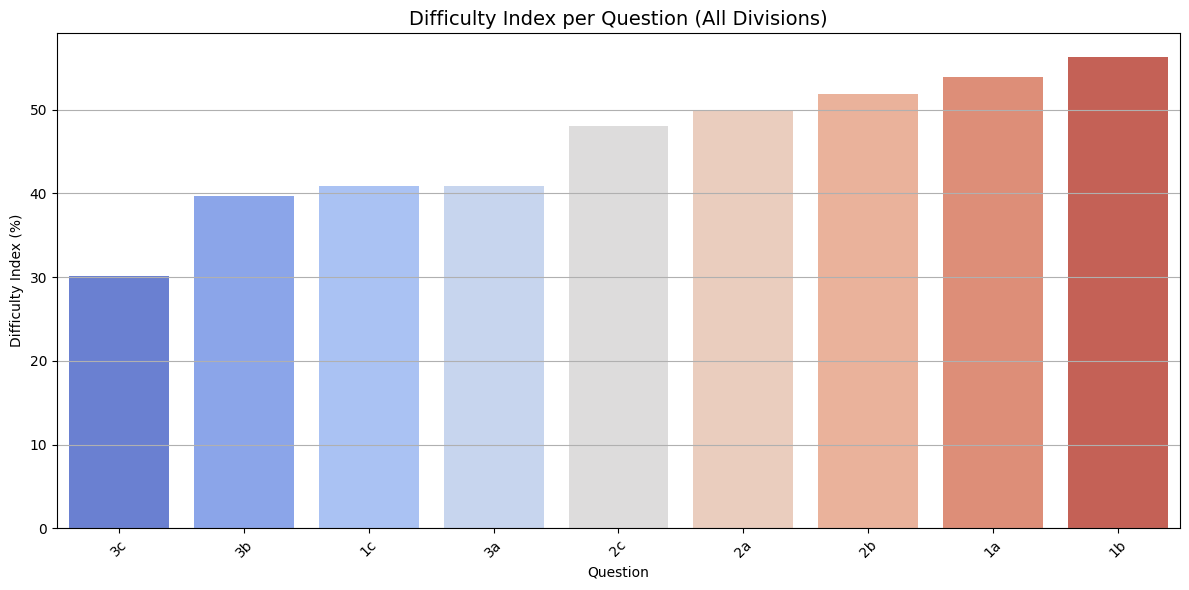

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=difficulty_df.index,
    y=difficulty_df["Difficulty Index (%)"],
    palette="coolwarm"
)

plt.title("Difficulty Index per Question (All Divisions)", fontsize=14)
plt.ylabel("Difficulty Index (%)")
plt.xlabel("Question")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("difficulty_index_plot.png")
plt.show()


In [36]:
easiest_q = difficulty_df["Difficulty Index (%)"].idxmax()
hardest_q = difficulty_df["Difficulty Index (%)"].idxmin()
easy_score = difficulty_df.loc[easiest_q, "Difficulty Index (%)"]
hard_score = difficulty_df.loc[hardest_q, "Difficulty Index (%)"]

display(Markdown(f"""
### 📘 Interpretation – Difficulty Index

- **Easiest question:** `{easiest_q}` with DI = **{easy_score:.1f}%**
- **Hardest question:** `{hardest_q}` with DI = **{hard_score:.1f}%**

Questions with lower Difficulty Index scores are more challenging for students. These can be reviewed for complexity, coverage in class, or clarity of phrasing.

> Consider reinforcing topics linked to lower DI questions in future classes or assessments.
"""))



### 📘 Interpretation – Difficulty Index

- **Easiest question:** `1b` with DI = **56.3%**
- **Hardest question:** `3c` with DI = **30.2%**

Questions with lower Difficulty Index scores are more challenging for students. These can be reviewed for complexity, coverage in class, or clarity of phrasing.

> Consider reinforcing topics linked to lower DI questions in future classes or assessments.


In [37]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=25a8543f68e4dc2bd829637684d747d4cd6633afce0a2423af697d7be158a1d9
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [40]:
import os

# Output folder in Google Drive
output_folder = "/content/drive/MyDrive/ALL_division/Division_Reports"
os.makedirs(output_folder, exist_ok=True)


In [42]:
import pandas as pd
import re

# Adjust the filename if needed
metadata_path = "/content/CN1_M1.txt"

# Read .txt and extract metadata
with open(metadata_path, "r", encoding="utf-8") as f:
    qp_text = f.read()

pattern = re.compile(
    r"(?P<QNo>[1-9][a-z])\s*[\n:]?"
    r"(?P<Question>.*?)\s+"
    r"(?P<Marks>\d+)\s+"
    r"(?P<CO>\d+)\s+"
    r"(?P<BloomLevel>L\d+)\s+"
    r"(?P<PO>\d+)\s+"
    r"(?P<PICode>\d+\.\d+\.\d+)",
    re.DOTALL
)

matches = pattern.findall(qp_text)
qp_metadata = pd.DataFrame(matches, columns=["Q.No", "Question", "Max Marks", "CO", "Bloom Level", "PO", "PI Code"])
qp_metadata["Q.No"] = qp_metadata["Q.No"].str.lower().str.strip()


In [43]:
from fpdf import FPDF

def generate_division_pdf(div_name, summary_text, chart_paths, output_folder):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, f"Division {div_name} – Performance Report", ln=True, align="C")
    pdf.ln(10)
    pdf.set_font("Arial", "", 12)
    for line in summary_text.split('\n'):
        pdf.multi_cell(0, 10, line)
    pdf.ln(5)
    for chart_path in chart_paths:
        if os.path.exists(chart_path):
            pdf.image(chart_path, w=170)
            pdf.ln(10)
    filename = os.path.join(output_folder, f"Division_{div_name}_Report.pdf")
    pdf.output(filename)
    return filename


In [54]:
# STEP 0: Install FPDF if not already done
!pip install fpdf

# STEP 1: Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import re
from collections import defaultdict

# STEP 2: Paths
folder_path = "/content/drive/MyDrive/ALL_division"
output_folder = os.path.join(folder_path, "Division_Reports")
os.makedirs(output_folder, exist_ok=True)
metadata_path = os.path.join(folder_path, "CN1_M1.txt")

# STEP 3: Load metadata from CN1_M1.txt
with open(metadata_path, "r", encoding="utf-8") as f:
    qp_text = f.read()

pattern = re.compile(
    r"(?P<QNo>[1-9][a-z])\s*[\n:]?"
    r"(?P<Question>.*?)\s+"
    r"(?P<Marks>\d+)\s+"
    r"(?P<CO>\d+)\s+"
    r"(?P<BloomLevel>L\d+)\s+"
    r"(?P<PO>\d+)\s+"
    r"(?P<PICode>\d+\.\d+\.\d+)",
    re.DOTALL
)
matches = pattern.findall(qp_text)
qp_metadata = pd.DataFrame(matches, columns=["Q.No", "Question", "Max Marks", "CO", "Bloom Level", "PO", "PI Code"])
qp_metadata["Q.No"] = qp_metadata["Q.No"].str.lower().str.strip()

# STEP 4: Bloom level description
def bloom_description(bloom_level):
    if bloom_level == "L1":
        return "basic recall"
    elif bloom_level == "L2":
        return "understanding and application"
    elif bloom_level == "L3":
        return "higher-order (analysis/evaluation)"
    else:
        return "mixed-level"

# STEP 5: PDF Generator with dynamic interpretations
def generate_division_pdf(div_name, summary_text, chart_paths, output_folder,
                          bloom_grouped, difficulty, grade_counts):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, f"Division {div_name} - Performance Report", ln=True, align="C")
    pdf.ln(10)

    pdf.set_font("Arial", "", 12)
    for line in summary_text.split('\n'):
        pdf.multi_cell(0, 10, line.encode("latin-1", "replace").decode("latin-1"))

    pdf.ln(5)

    # Chart 1: Bloom Pie
    if os.path.exists(chart_paths[0]):
        pdf.image(chart_paths[0], w=170)
        pdf.set_font("Arial", "I", 11)
        dominant = bloom_grouped.idxmax()
        dominant_pct = (bloom_grouped[dominant] / bloom_grouped.sum()) * 100
        interpretation = f"Most marks came from {dominant} level ({dominant_pct:.1f}%), indicating emphasis on {bloom_description(dominant)} questions."
        pdf.multi_cell(0, 10, interpretation)

    # Chart 2: Difficulty Index
    if os.path.exists(chart_paths[1]):
        pdf.image(chart_paths[1], w=170)
        pdf.set_font("Arial", "I", 11)
        easiest = difficulty.idxmax()
        hardest = difficulty.idxmin()
        interpretation = f"Easiest question: {easiest} ({difficulty[easiest]:.1f}%)\nHardest question: {hardest} ({difficulty[hardest]:.1f}%)"
        pdf.multi_cell(0, 10, interpretation)

    # Chart 3: Grade Distribution
    if os.path.exists(chart_paths[2]):
        pdf.image(chart_paths[2], w=170)
        pdf.set_font("Arial", "I", 11)
        top_grade = grade_counts.idxmax()
        interpretation = f"Most students scored grade '{top_grade}' ({grade_counts[top_grade]} students)."
        if "D" in grade_counts and grade_counts["D"] > 0:
            interpretation += f" {grade_counts['D']} students are in grade 'D', suggesting a need for support."
        pdf.multi_cell(0, 10, interpretation)

    filename = os.path.join(output_folder, f"Division_{div_name}_Report.pdf")
    pdf.output(filename)
    return filename

# STEP 6: Process all divisions
pdf_paths = []

for file in sorted(os.listdir(folder_path)):
    if file.endswith(".csv") and "Division_Reports" not in file:
        div_name = file.split("_")[0].upper()
        df = pd.read_csv(os.path.join(folder_path, file))
        df = df.drop(columns=["SL.No", "Roll.No", "USN", "Name"], errors="ignore")
        df = df.replace("-", pd.NA).apply(pd.to_numeric, errors="coerce")
        df.columns = df.columns.str.strip().str.lower()
        valid_qs = list(set(qp_metadata["Q.No"]) & set(df.columns))
        df = df[valid_qs]

        # Summary Stats
        total_scores = df.sum(axis=1, skipna=True)
        avg = round(total_scores.mean(), 2)
        std = round(total_scores.std(), 2)
        min_score = total_scores.min()
        max_score = total_scores.max()
        count = total_scores.count()

        summary_text = (
            f"Summary Stats for Division {div_name}:\n"
            f"- Average Score: {avg}\n"
            f"- Std Deviation: {std}\n"
            f"- Max Score: {max_score}\n"
            f"- Min Score: {min_score}\n"
            f"- Student Count: {count}\n"
        )

        # Bloom Pie Chart
        summary = pd.DataFrame(index=df.columns)
        summary["Avg Marks"] = df.mean()
        summary["Max Marks"] = summary.index.map(qp_metadata.set_index("Q.No")["Max Marks"].astype(int))
        summary["Bloom Level"] = summary.index.map(qp_metadata.set_index("Q.No")["Bloom Level"])
        bloom_grouped = summary.groupby("Bloom Level")["Avg Marks"].sum()

        pie_path = os.path.join(output_folder, f"{div_name}_bloom_pie.png")
        plt.figure(figsize=(5, 5))
        plt.pie(bloom_grouped, labels=bloom_grouped.index, autopct='%1.1f%%')
        plt.title(f"Bloom's Level - Division {div_name}")
        plt.tight_layout()
        plt.savefig(pie_path)
        plt.close()

        # Difficulty Index Chart
        difficulty = ((summary["Avg Marks"] / summary["Max Marks"]) * 100).sort_values()
        diff_path = os.path.join(output_folder, f"{div_name}_difficulty.png")
        plt.figure(figsize=(8, 4))
        sns.barplot(x=difficulty.index, y=difficulty.values, hue=difficulty.index, palette="coolwarm", legend=False)
        plt.title(f"Difficulty Index - Division {div_name}")
        plt.ylabel("Difficulty Index (%)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(diff_path)
        plt.close()

        # Grade Distribution Chart
        df.columns = df.columns.str.lower().str.strip()
        question_groups = defaultdict(list)
        for q in df.columns:
            if q[0].isdigit():
                main_q = f"Q{q[0]}"
                question_groups[main_q].append(q)

        grouped_scores = pd.DataFrame(index=df.index)
        for group, subqs in question_groups.items():
            grouped_scores[group] = df[subqs].sum(axis=1, skipna=True)

        grouped_scores["Total_40"] = grouped_scores.apply(lambda row: sum(sorted(row, reverse=True)[:2]), axis=1)
        grouped_scores["Total_20"] = (grouped_scores["Total_40"] / 40 * 20).round(2)

        score_for_grading = grouped_scores["Total_20"]
        grade_series = pd.cut(score_for_grading, bins=[-1, 5, 8, 12, 17, 20], labels=["D", "C", "B", "A", "S"])
        grade_counts = grade_series.value_counts().sort_index()

        grade_path = os.path.join(output_folder, f"{div_name}_grades.png")
        plt.figure(figsize=(6, 4))
        sns.barplot(x=grade_counts.index, y=grade_counts.values, hue=grade_counts.index, palette="Set2", legend=False)
        plt.title(f"Grade Distribution - Division {div_name}")
        plt.xlabel("Grade")
        plt.ylabel("Number of Students")
        plt.tight_layout()
        plt.savefig(grade_path)
        plt.close()

        # Generate PDF with interpretations
        pdf_path = generate_division_pdf(
            div_name,
            summary_text,
            [pie_path, diff_path, grade_path],
            output_folder,
            bloom_grouped,
            difficulty,
            grade_counts
        )
        pdf_paths.append(pdf_path)

# STEP 7: Show generated PDF list
pd.DataFrame({"PDF Report Path": pdf_paths})

,PDF Report Path
0,/content/drive/MyDrive/ALL_division/Division_R...
1,/content/drive/MyDrive/ALL_division/Division_R...
2,/content/drive/MyDrive/ALL_division/Division_R...
3,/content/drive/MyDrive/ALL_division/Division_R...
4,/content/drive/MyDrive/ALL_division/Division_R...
